<a href="https://colab.research.google.com/github/AbhijithP96/DeepL_CV/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [4]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts,random_state=123,noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

In [5]:
def scatter_plot():
  plt.scatter(X[y==0,0],X[y==0,1]) #blue = 0
  plt.scatter(X[y==1,0],X[y==1,1]) #orange = 1

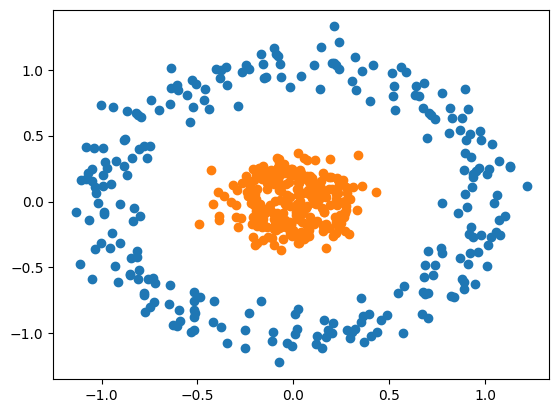

In [6]:
scatter_plot()

In [7]:
class Model(nn.Module):
  def __init__(self,input_size,H1,output_size):
    super().__init__()
    self.linear1 = nn.Linear(input_size,H1)
    self.linear2 = nn.Linear(H1,output_size)
  def forward(self,x):
    x = torch.sigmoid(self.linear1(x))
    pred = torch.sigmoid(self.linear2(x))
    return pred
  def predict(self,x):
    pred = self.forward(x)
    if pred >= 0.5 :
      return 1
    else:
      return 0

In [13]:
model = Model(2,4,1)

In [14]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters() , lr=0.1)

In [15]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred,y_data)
  print(f'epochs: {i} \t loss: {loss.item()}')

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epochs: 0 	 loss: 0.6934093832969666
epochs: 1 	 loss: 0.699688196182251
epochs: 2 	 loss: 0.6927224397659302
epochs: 3 	 loss: 0.6927931904792786
epochs: 4 	 loss: 0.694485604763031
epochs: 5 	 loss: 0.6924532651901245
epochs: 6 	 loss: 0.689469039440155
epochs: 7 	 loss: 0.688036322593689
epochs: 8 	 loss: 0.6875938773155212
epochs: 9 	 loss: 0.6860989332199097
epochs: 10 	 loss: 0.6829721927642822
epochs: 11 	 loss: 0.6790854930877686
epochs: 12 	 loss: 0.6752275824546814
epochs: 13 	 loss: 0.6712756752967834
epochs: 14 	 loss: 0.6664783954620361
epochs: 15 	 loss: 0.6603019833564758
epochs: 16 	 loss: 0.6528260707855225
epochs: 17 	 loss: 0.6444810032844543
epochs: 18 	 loss: 0.6356107592582703
epochs: 19 	 loss: 0.6262044906616211
epochs: 20 	 loss: 0.6159624457359314
epochs: 21 	 loss: 0.6046565771102905
epochs: 22 	 loss: 0.5923875570297241
epochs: 23 	 loss: 0.5794457197189331
epochs: 24 	 loss: 0.5659906268119812
epochs: 25 	 loss: 0.5519357919692993
epochs: 26 	 loss: 0.53713

Text(0.5, 0, 'Epochs')

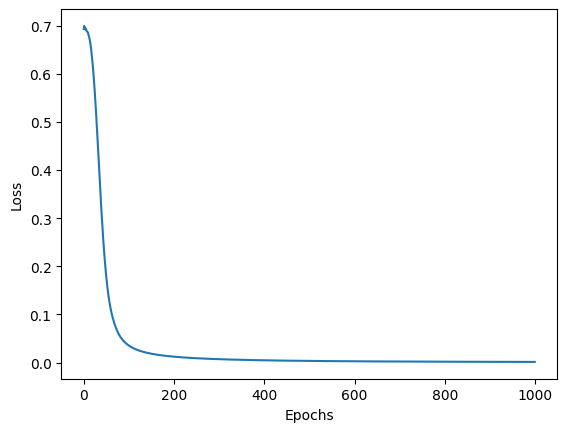

In [16]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [24]:
def plot_boundary(X,y):

  x_span = np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25)
  y_span = np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25)
  xx,yy = np.meshgrid(x_span,y_span)

  grid = torch.Tensor(np.c_[xx.ravel(),yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()

  plt.contourf(xx,yy,z)

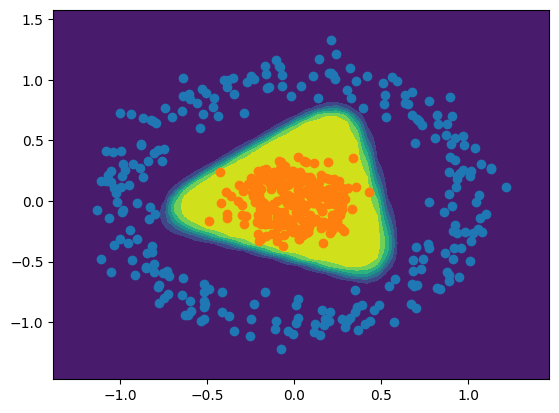

In [25]:
plot_boundary(X,y)
scatter_plot()

Predicited Class : 1


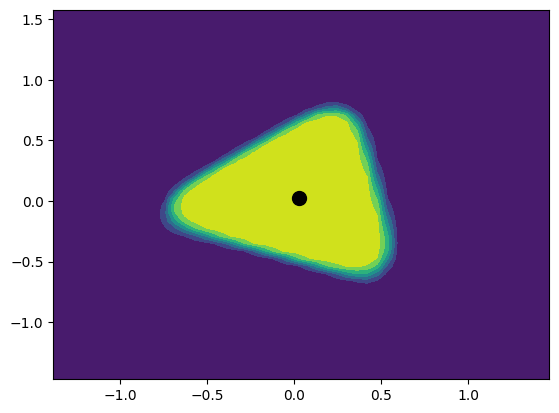

In [27]:
x = 0.025
y = 0.025
point = torch.tensor([x,y])
prediction = model.predict(point)
plt.plot([x],[y],marker='o',markersize=10,color='black')
print(f'Predicited Class : {prediction}')
plot_boundary(X,y)